<a href="https://colab.research.google.com/github/pradip9198/Regression-Project./blob/main/Yes_bank_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Prediction

project type: Regression

Team : Sanket C Sakhare ,  Pradip Godse

# GitHub Link :-

Project Description:

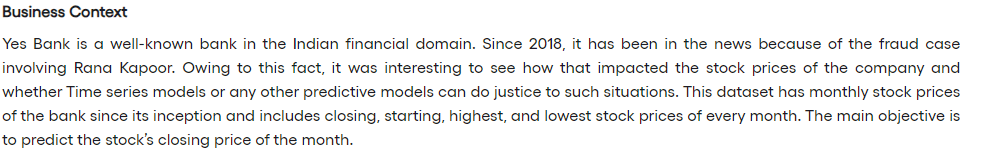

Data Description :

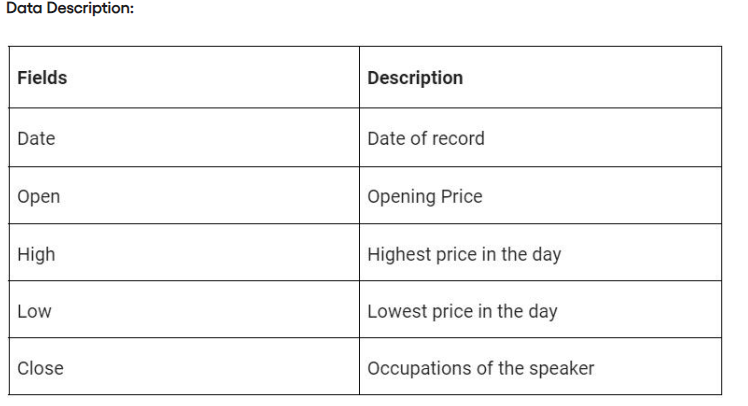

# Let's Get to know what is stock?

### A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Importing and Loading data

In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
dataset = pd.read_csv('/content/drive/MyDrive/Alma-better Data Sets/data_YesBank_StockPrices.csv')
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


# Data Exploration

In [ ]:
#information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#number of rows and columns
dataset.shape

(185, 5)

In [ ]:
numerical_col = dataset.describe().columns

Data Distribution and mean and median of each single Indpendent variable

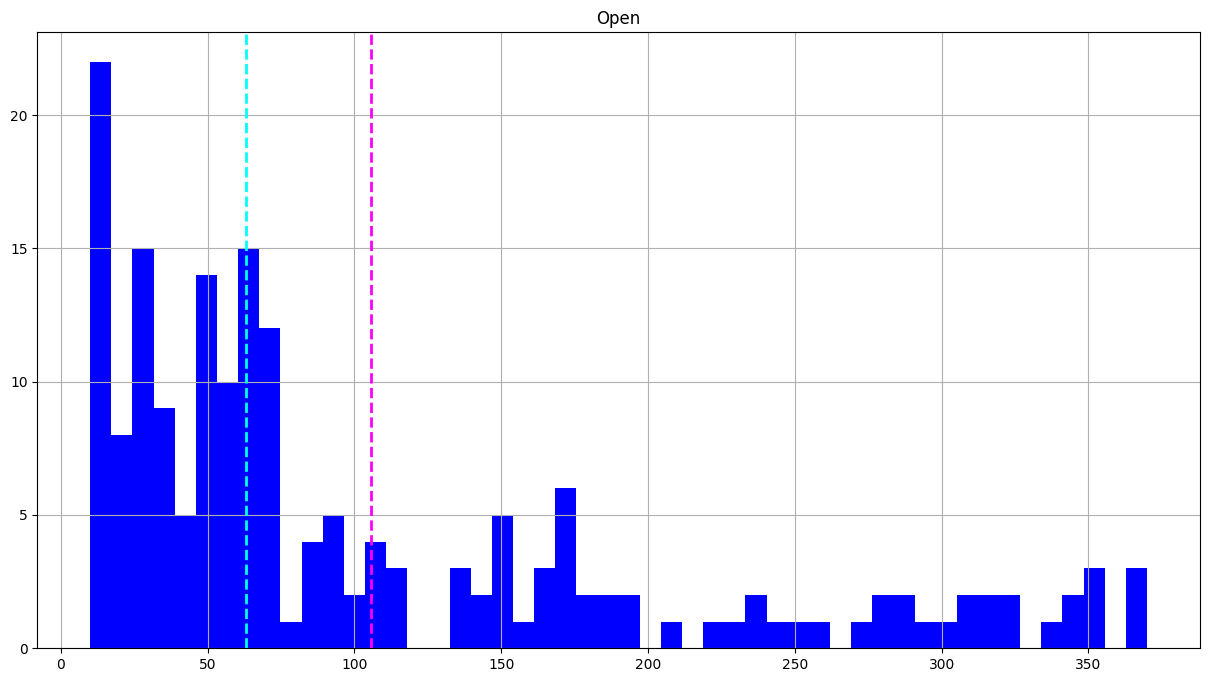

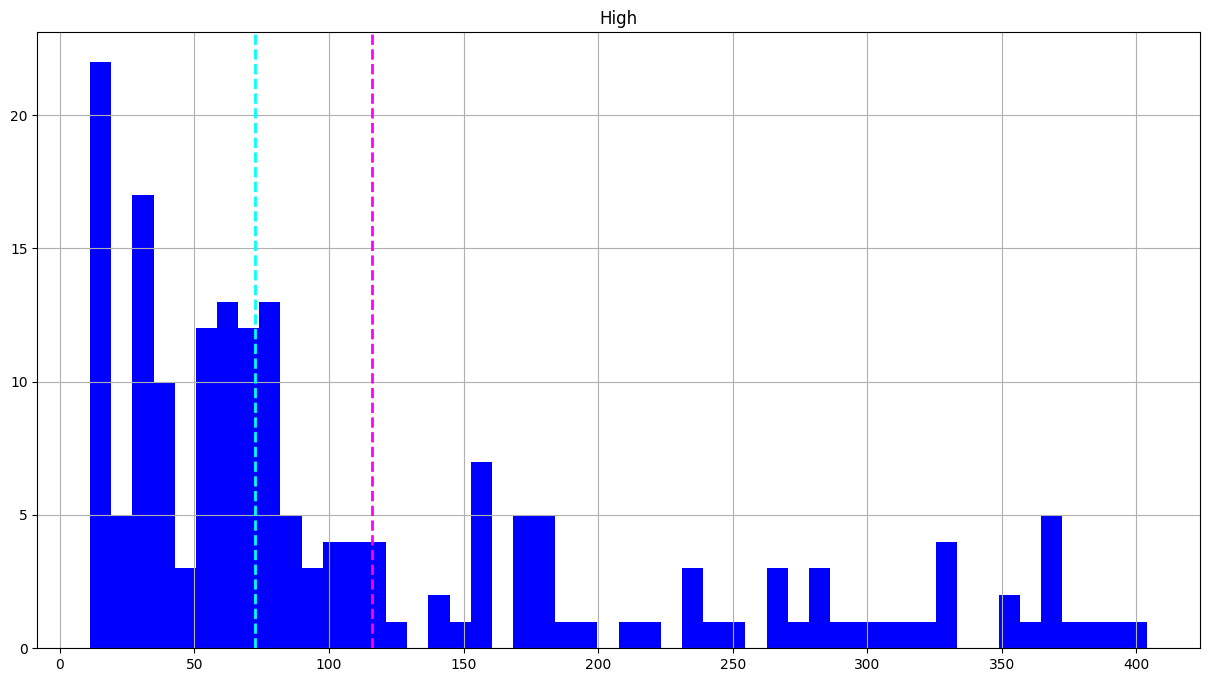

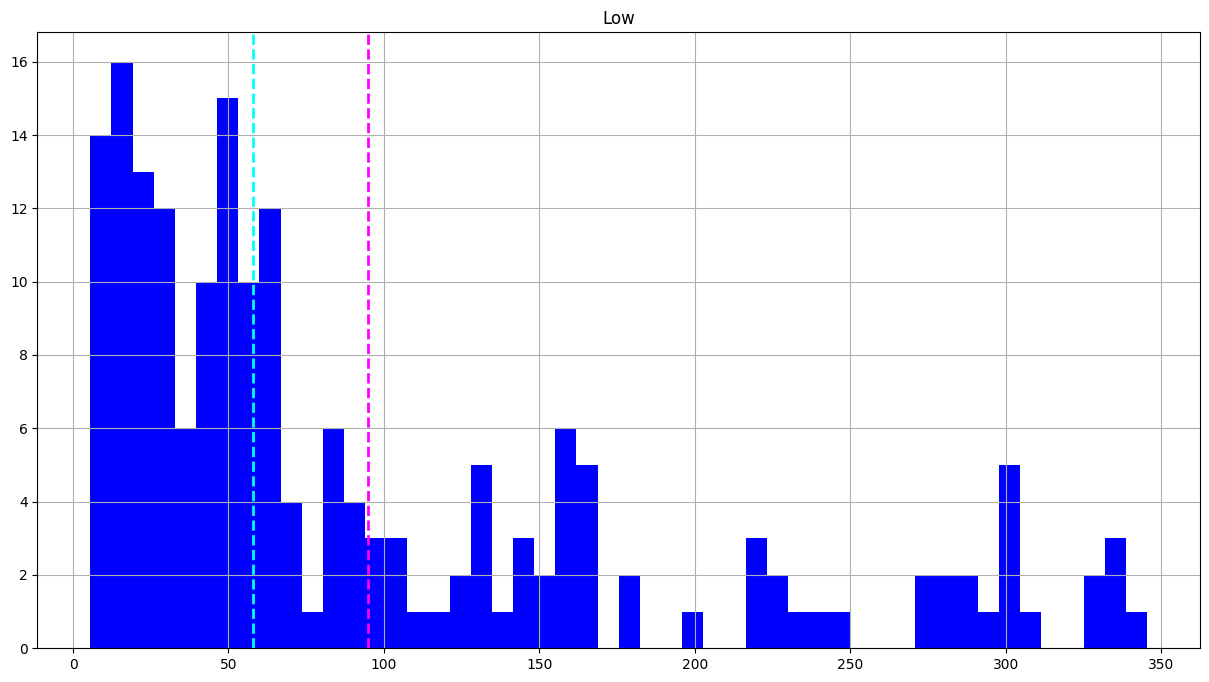

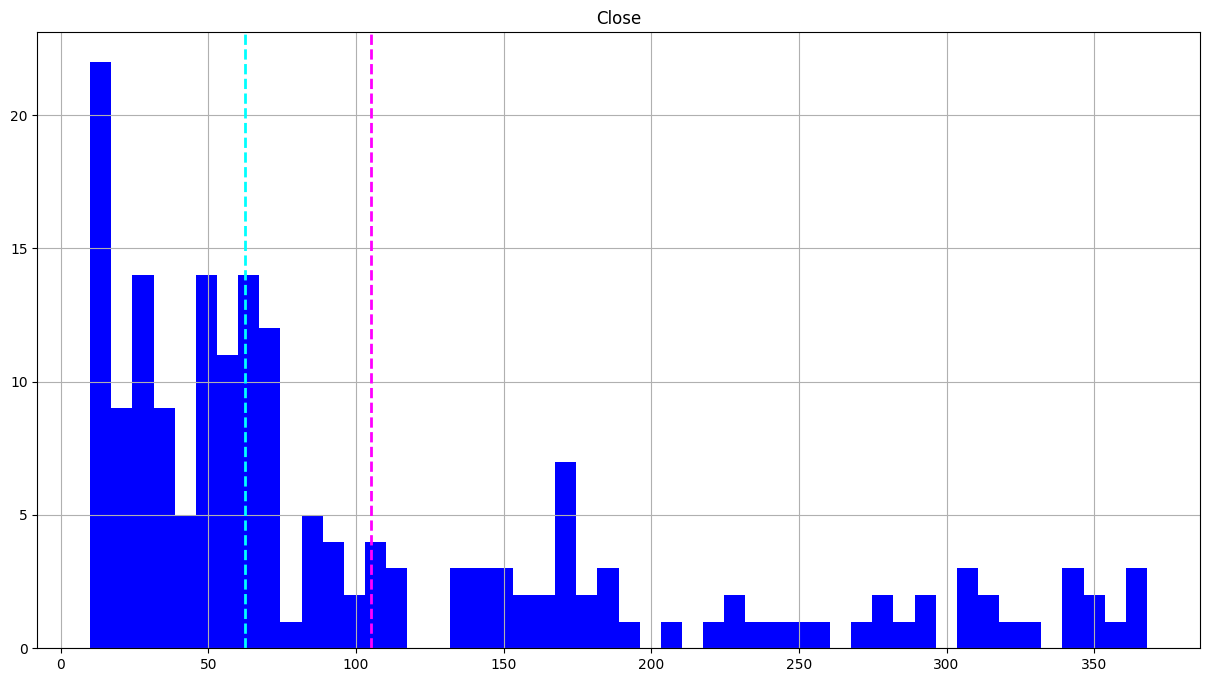

In [ ]:
for i in numerical_col[:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

# Variable Identification and Understanding Data

In [ ]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
#Decription of dataset
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


With the help of describe we can conclude that data is not normally distributed as mean is higher than median in all features

In [ ]:
# Identify Numerical Columns
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

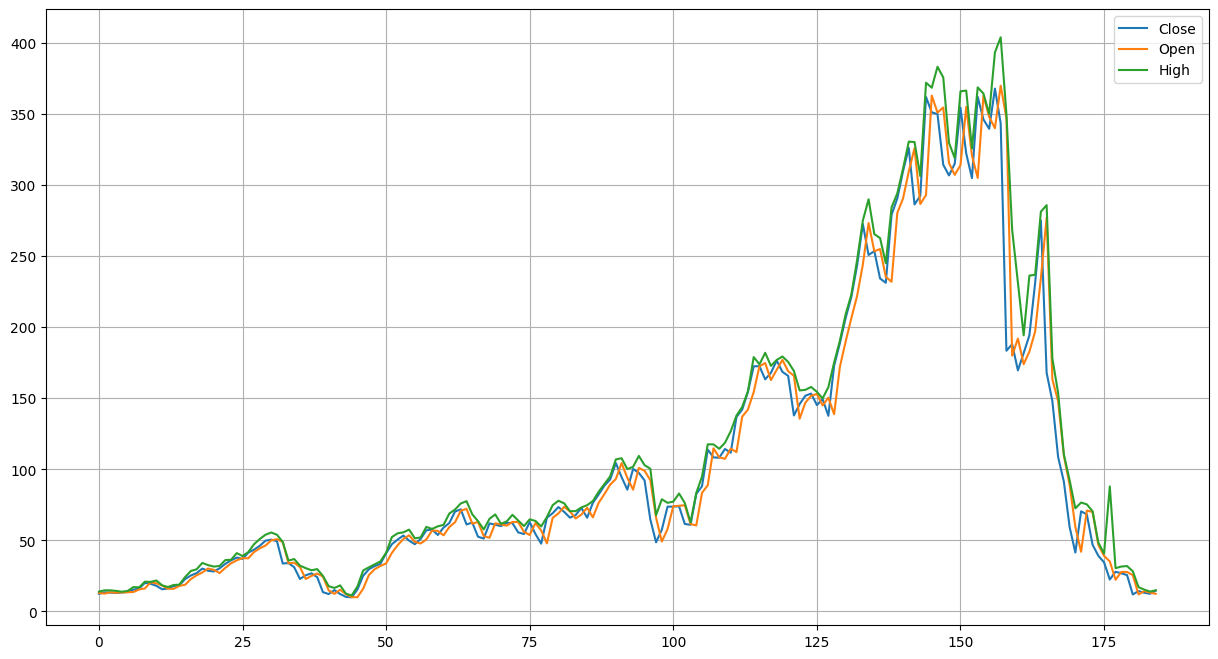

In [ ]:
# Line Plot
plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

# Checking for NuN values and Outliers

In [ ]:
# Checking Null Values
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# checking duplicate values
len(dataset[dataset.duplicated()])

0

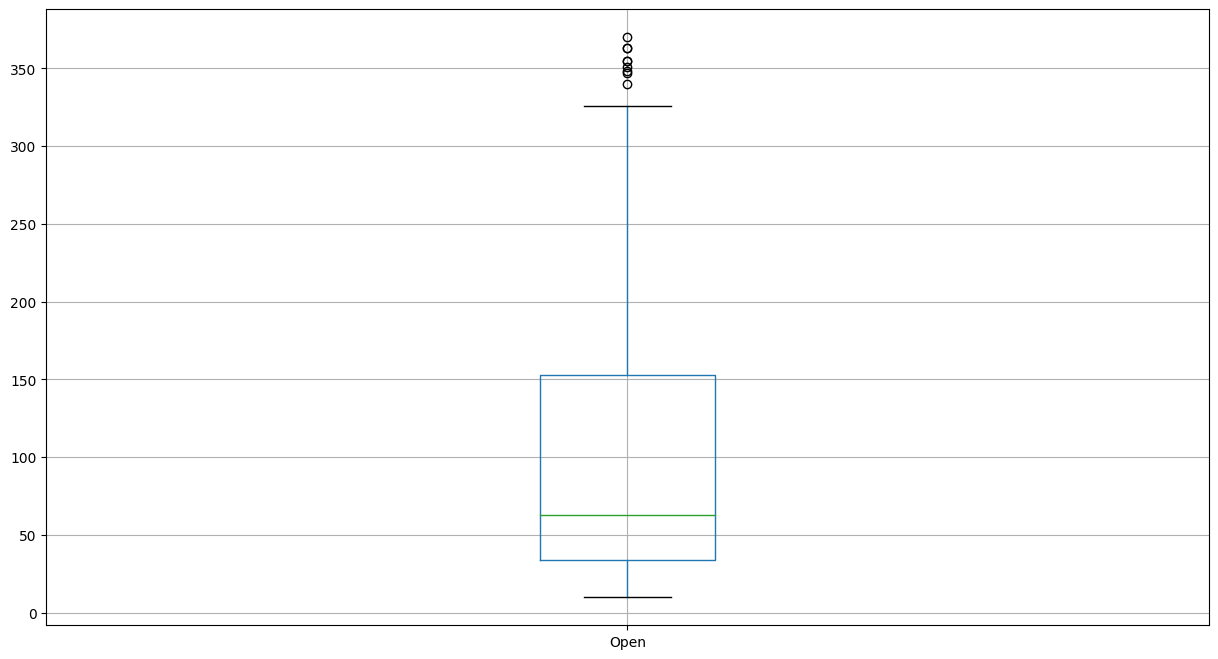

In [ ]:
plt.figure(figsize=(15,8))
dataset.boxplot('Open')
plt.show()

# Exploratory Data Analysis

Dependent Variable

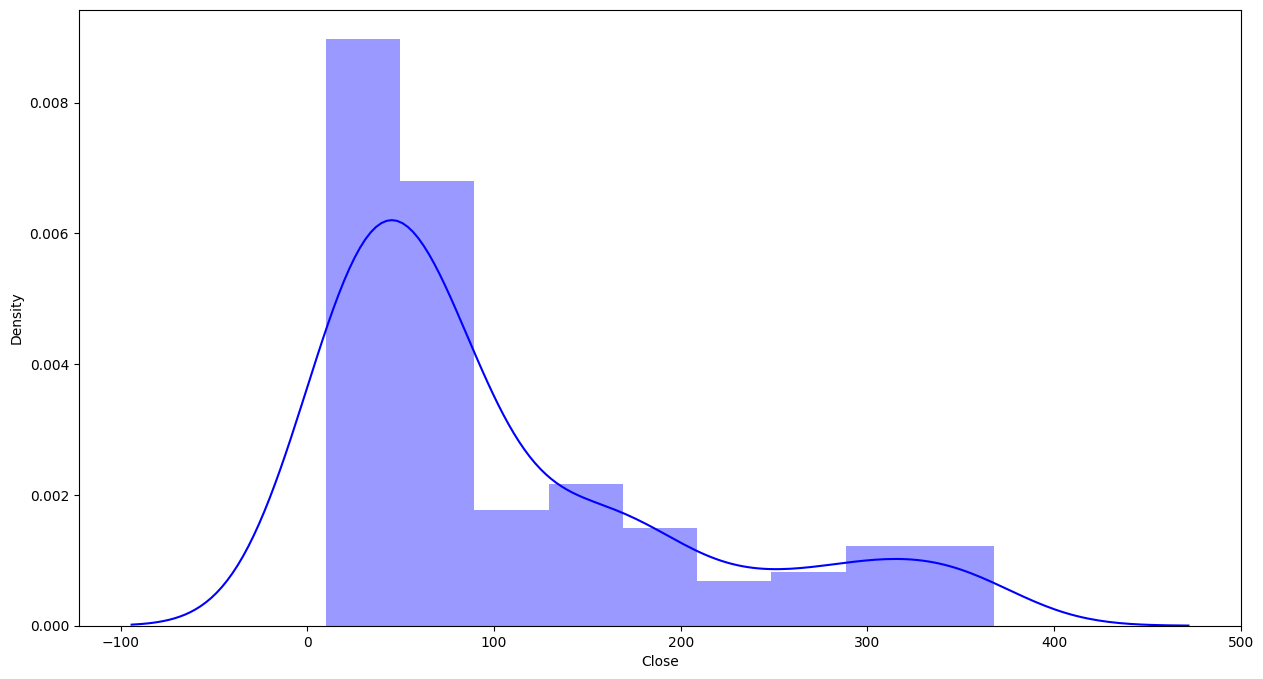

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='blue')
plt.show()

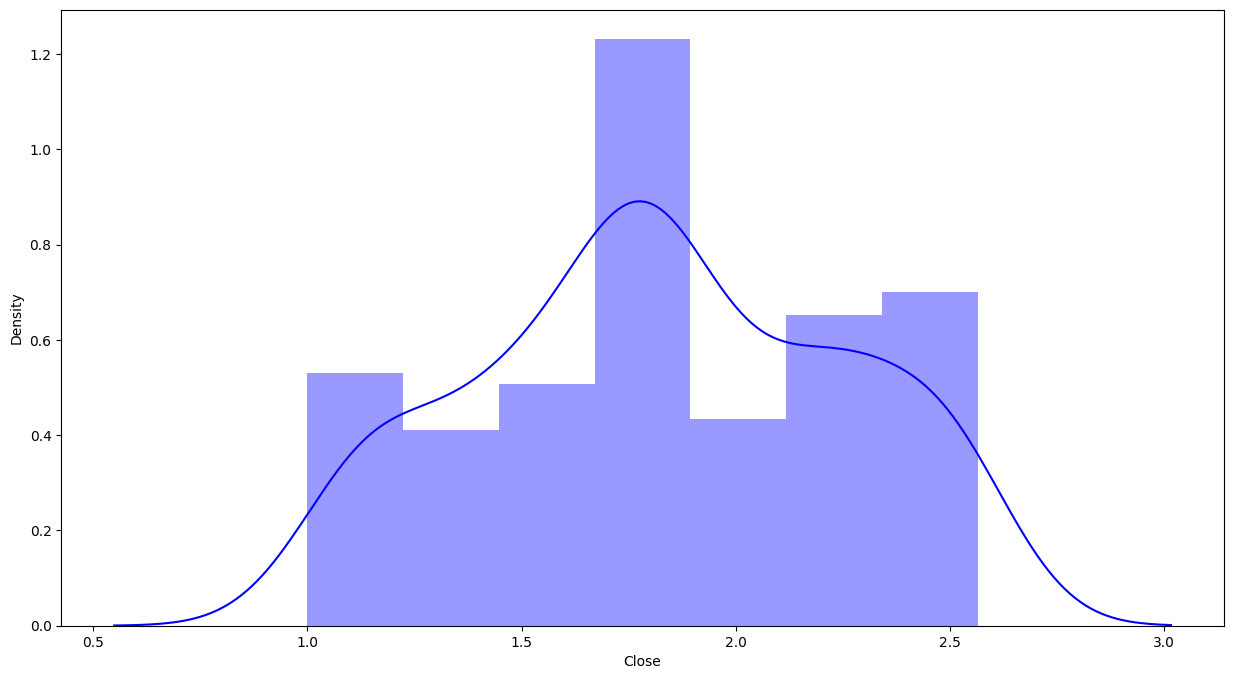

In [ ]:
# For normal Distribution
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()

# Independent Variable

<Axes: xlabel='Low', ylabel='Density'>

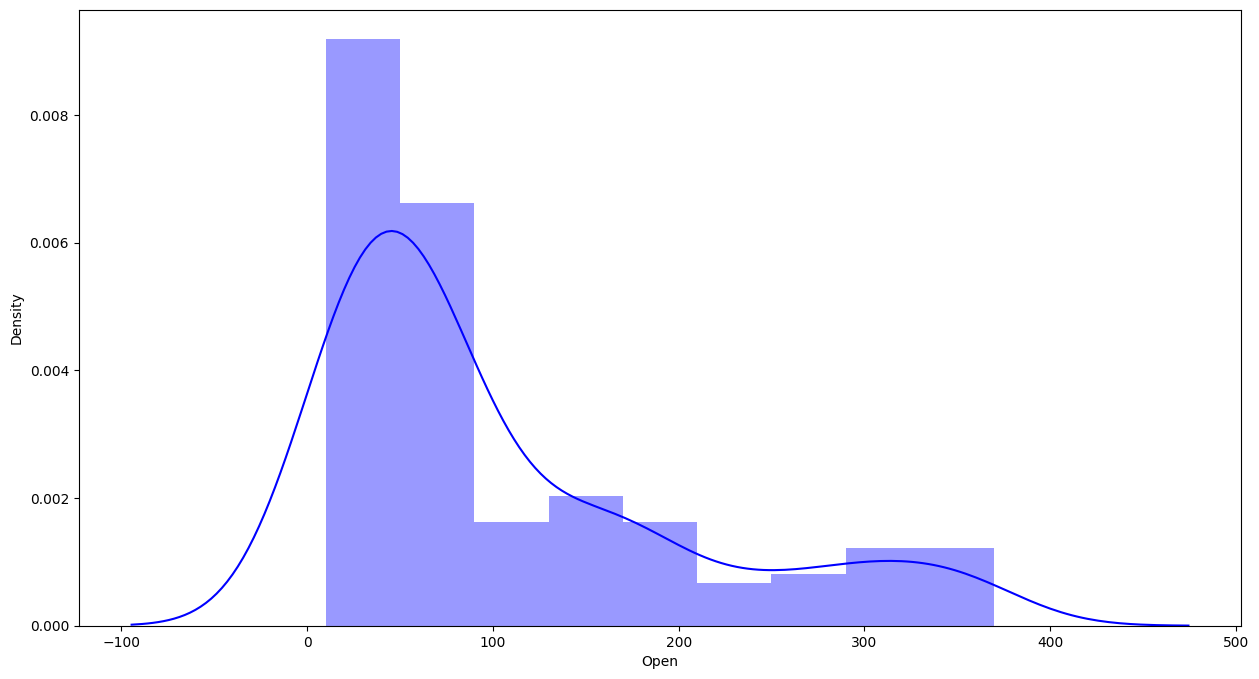

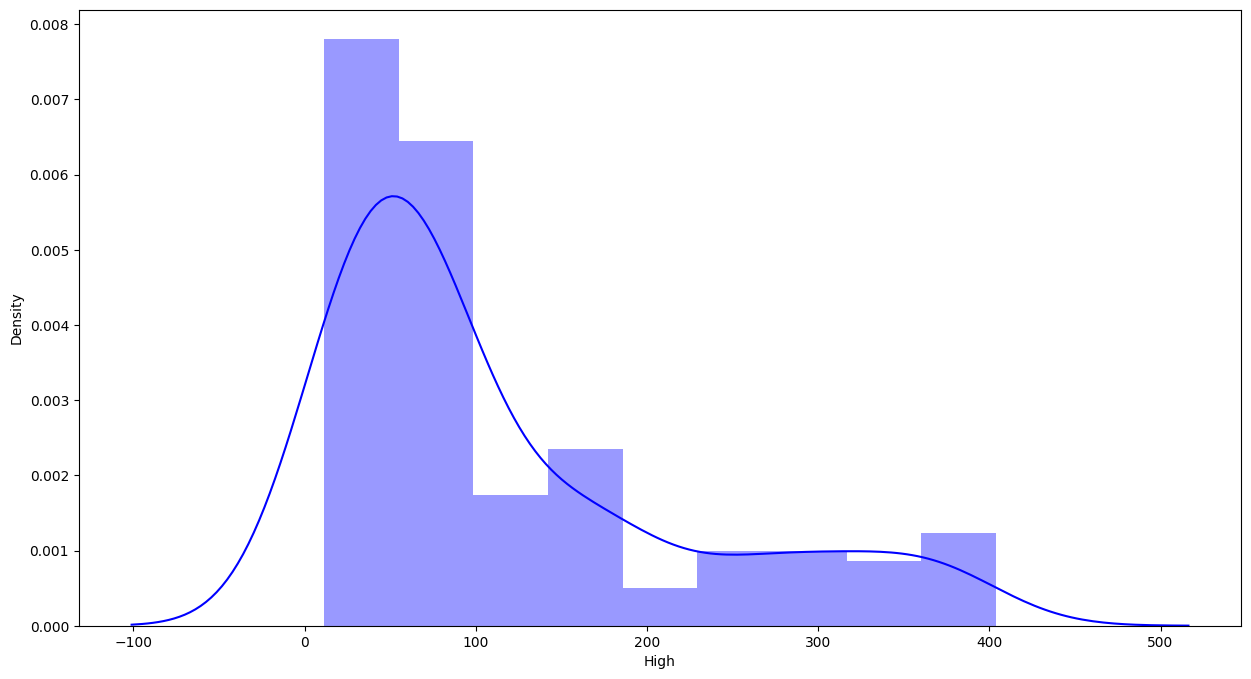

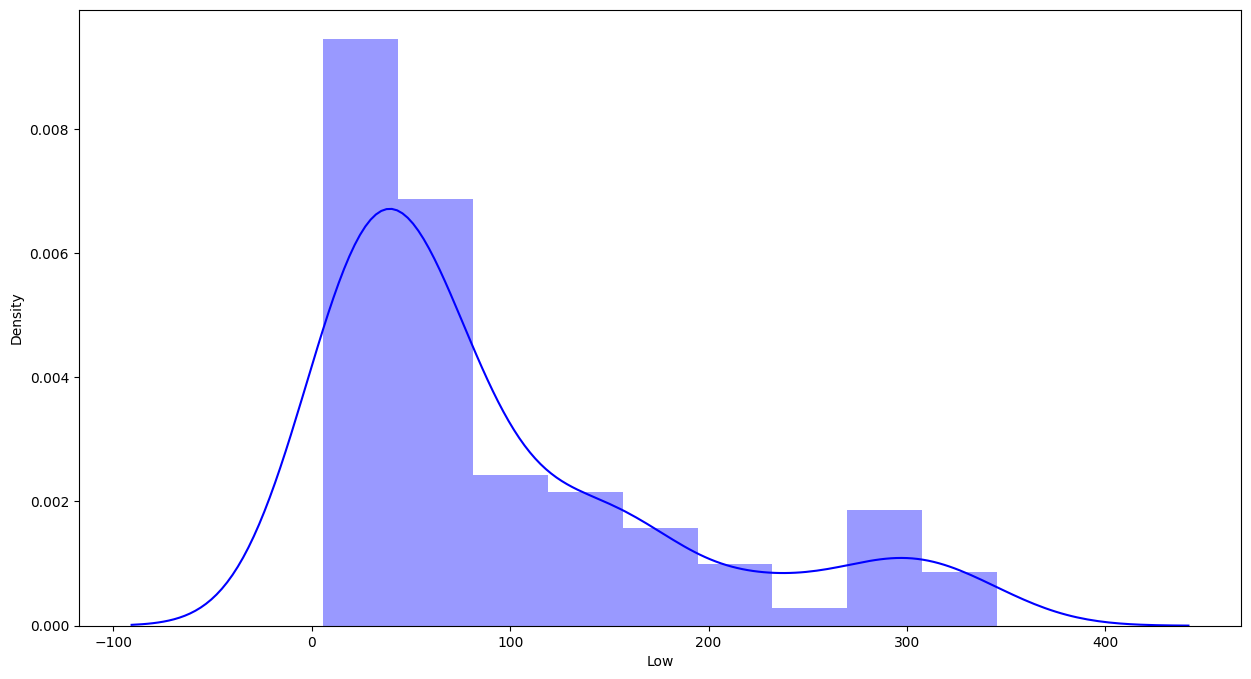

In [ ]:
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

<Axes: xlabel='Low', ylabel='Density'>

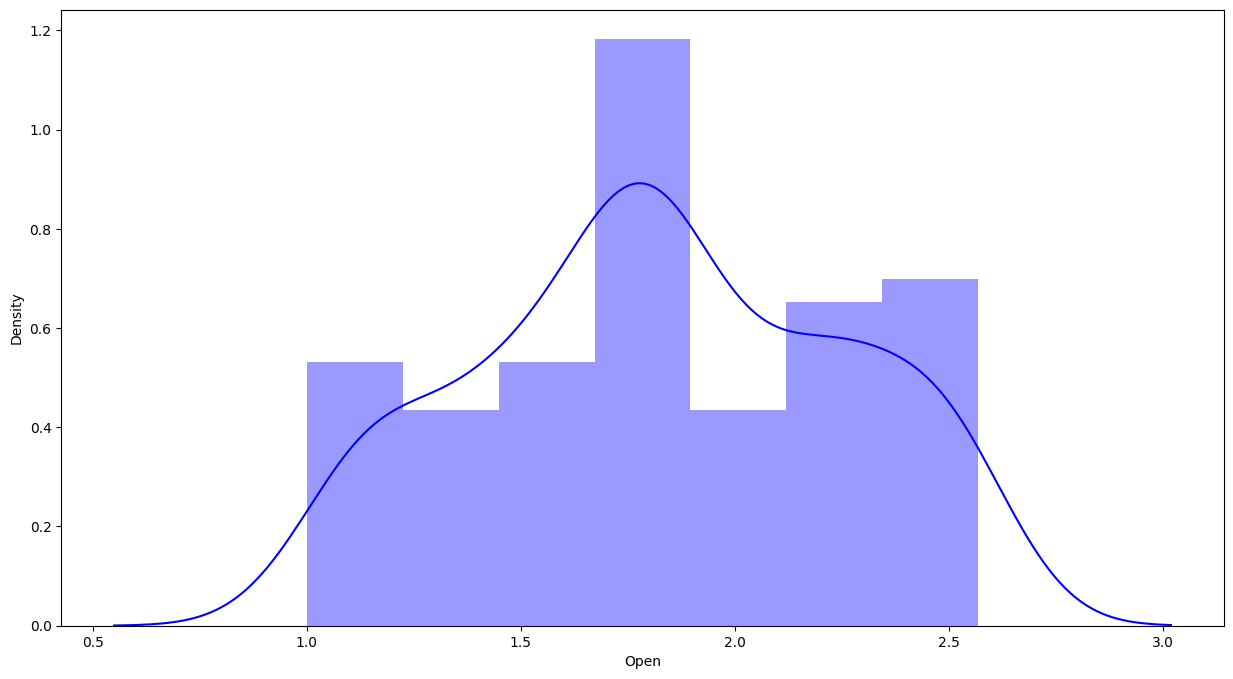

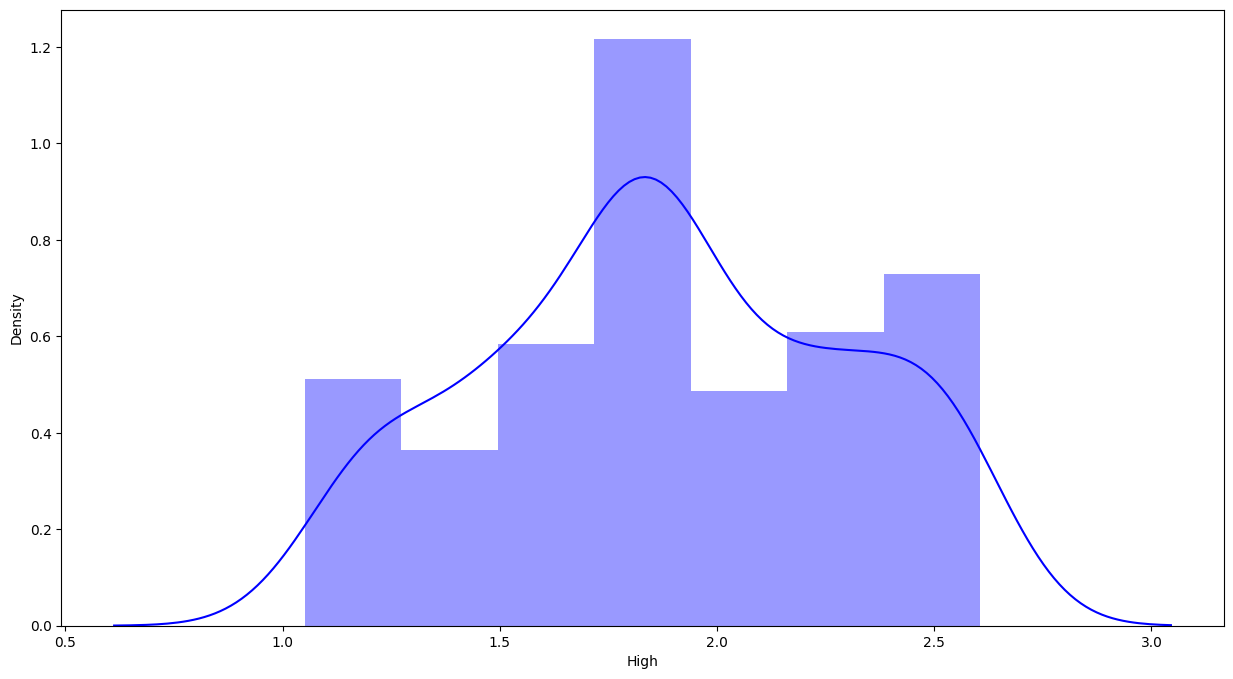

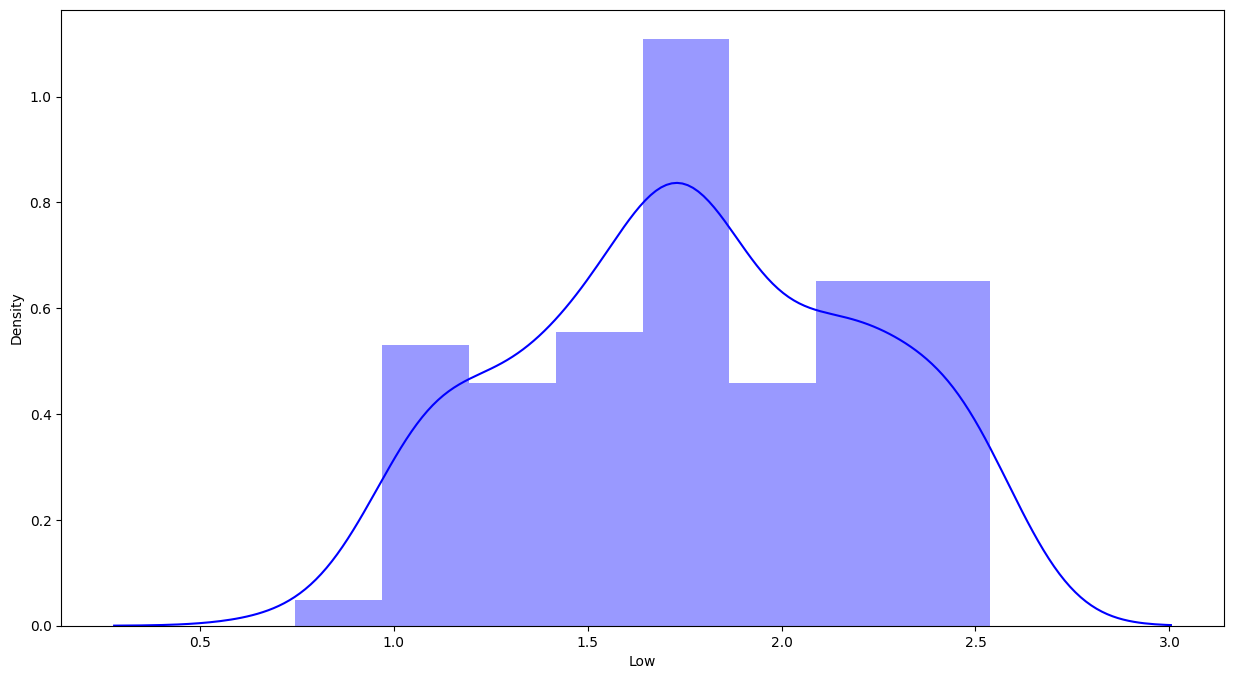

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')

<Axes: >

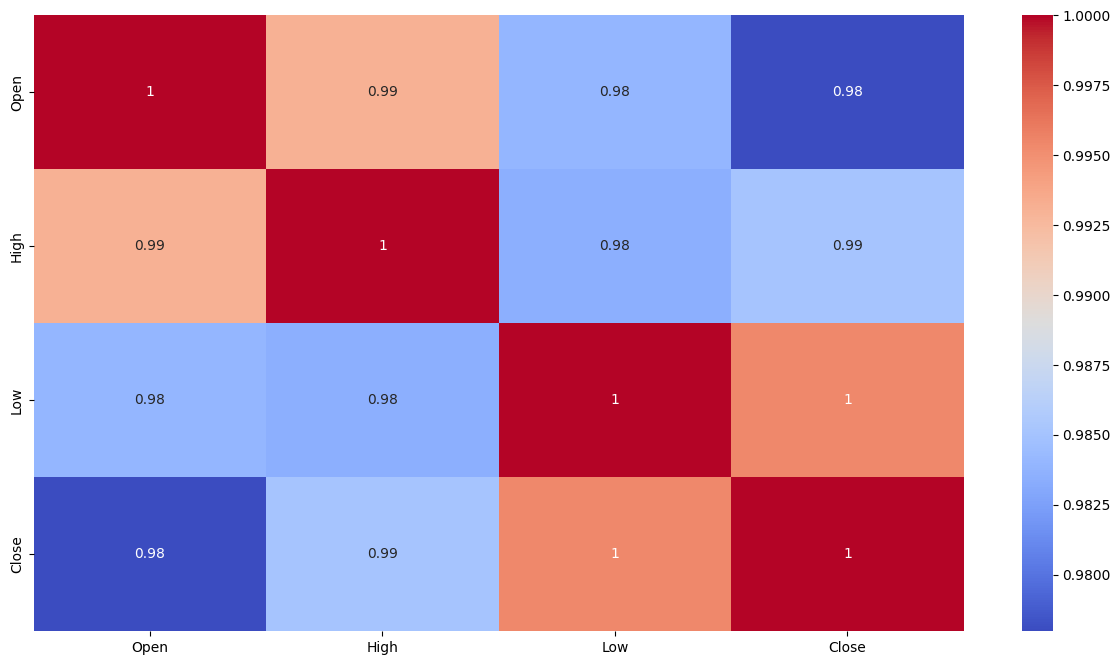

In [ ]:
# Correaltion Between the Variables
corr = dataset.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

Finding Correlation Between Variables

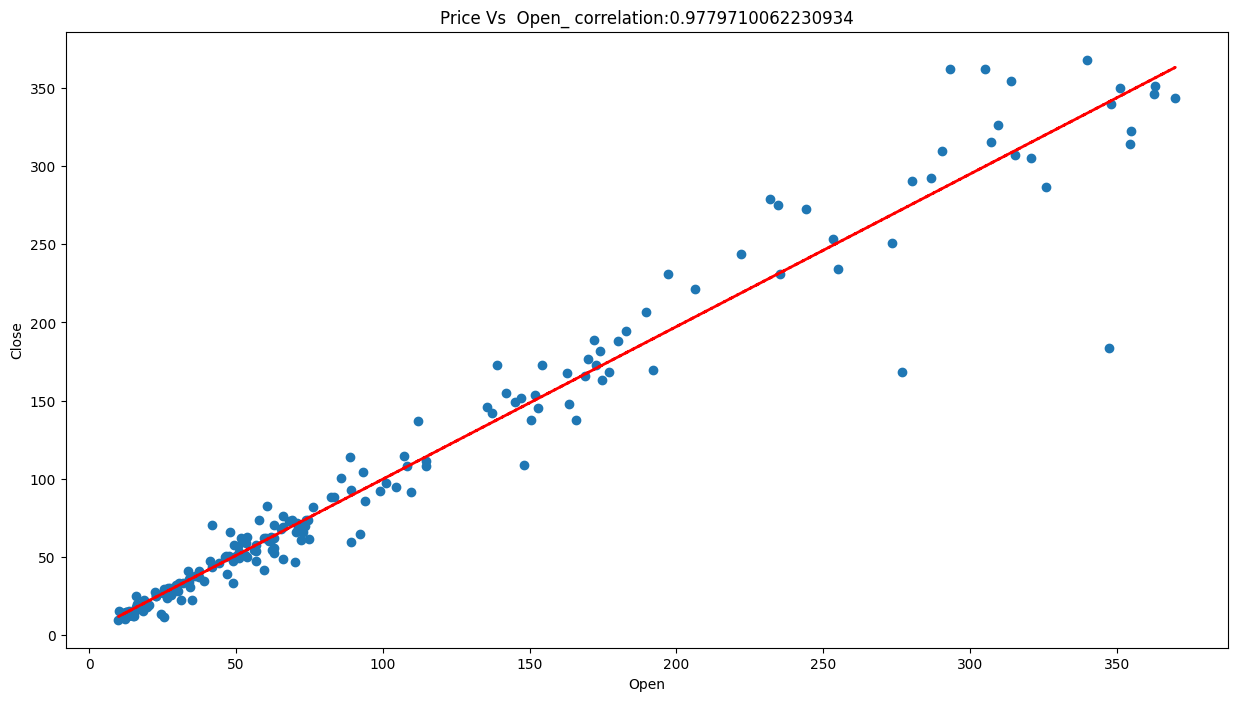

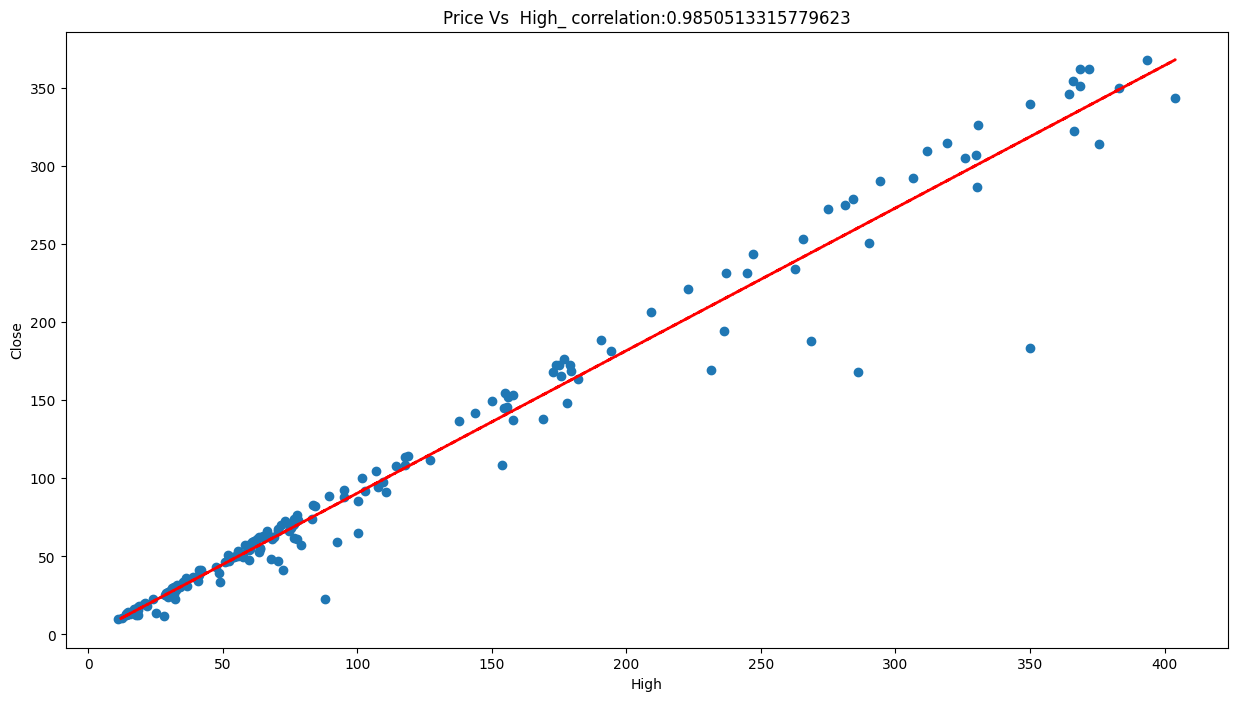

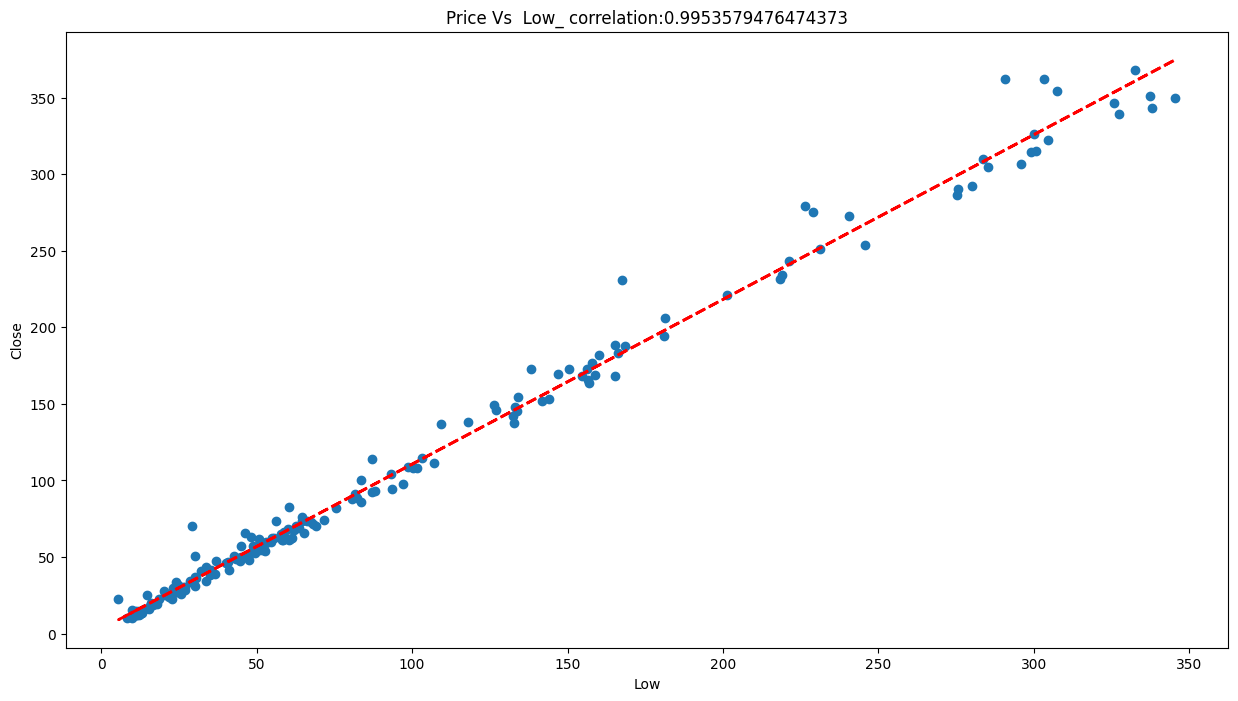

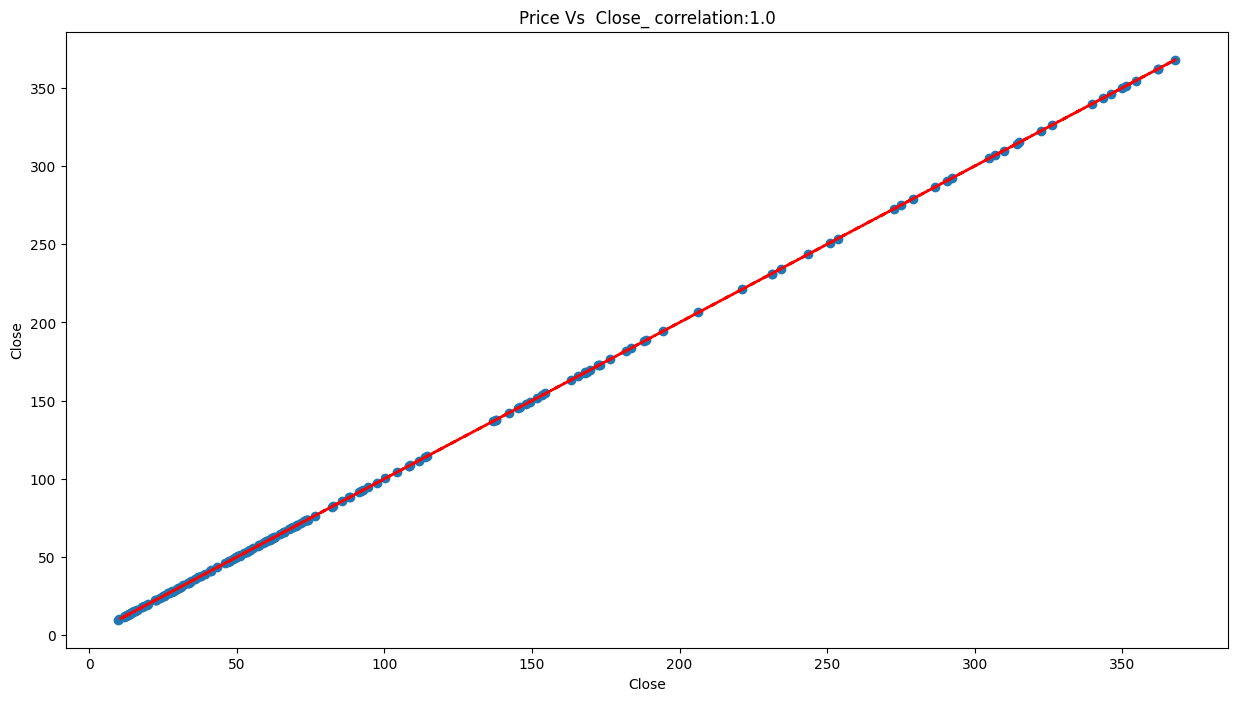

In [ ]:
for col in numerical_col[:]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


<Axes: >

<Figure size 1500x800 with 0 Axes>

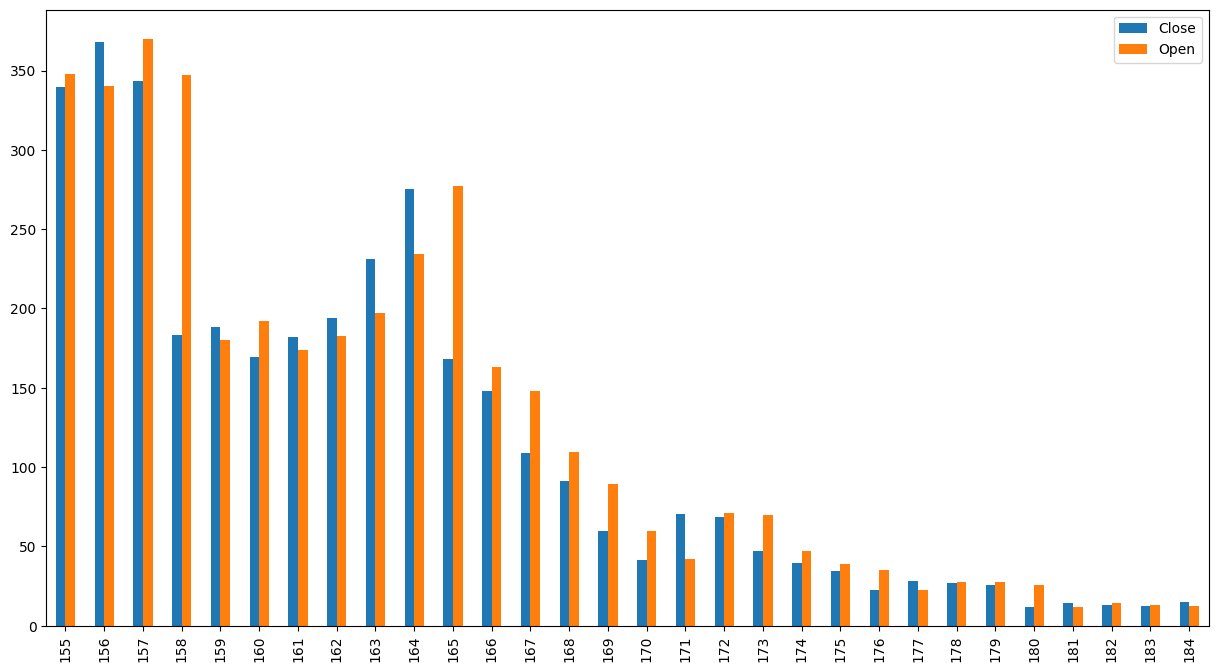

In [ ]:
plt.figure(figsize=(15,8))
dataset[['Close','Open']].tail(30).plot(kind='bar',figsize=(15,8))

# Linear Regression Model

Normalization

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = dataset.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(dataset['Close'])

Train Test Split

In [ ]:
# Creating Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


# Linear Regrassion

In [ ]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.8146653424416905

In [ ]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [ ]:
reg.intercept_

1.8292785179315048

In [ ]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

# Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [ ]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


Linear Regression Predication vs Actual

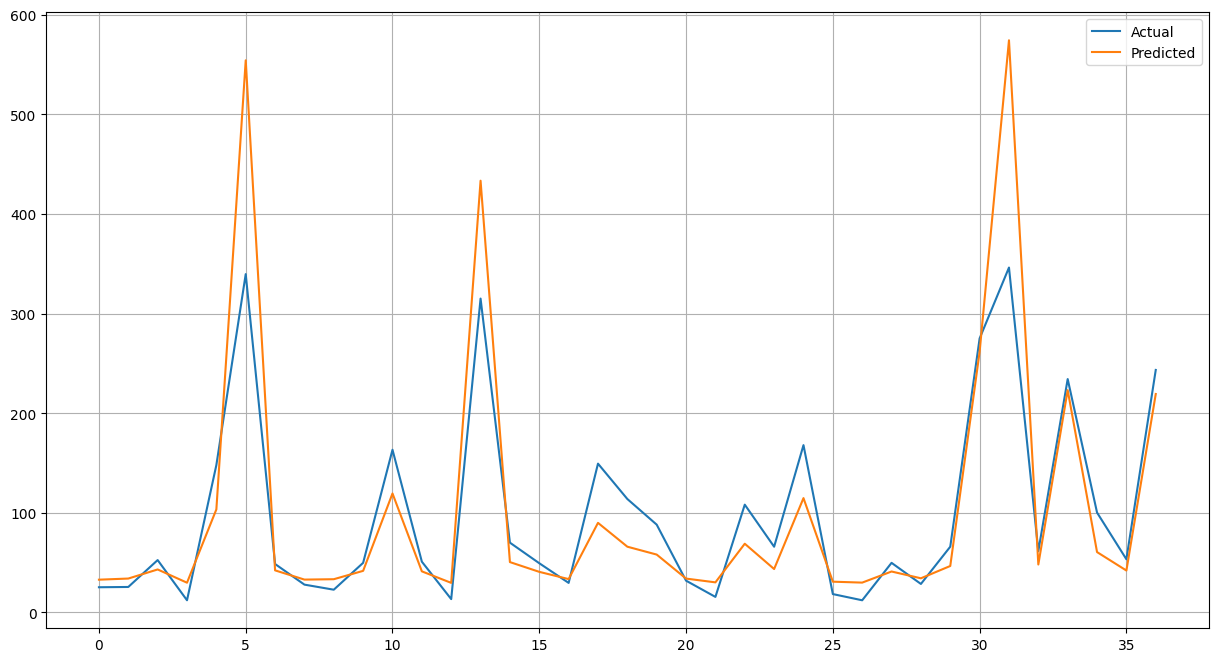

In [ ]:
# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)

In [ ]:
lasso.score(X_train,y_train)

0.8143673030311667

In [ ]:
y_lasso_pred = lasso.predict(X_test)

# Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


# Lasso Predication vs Actual

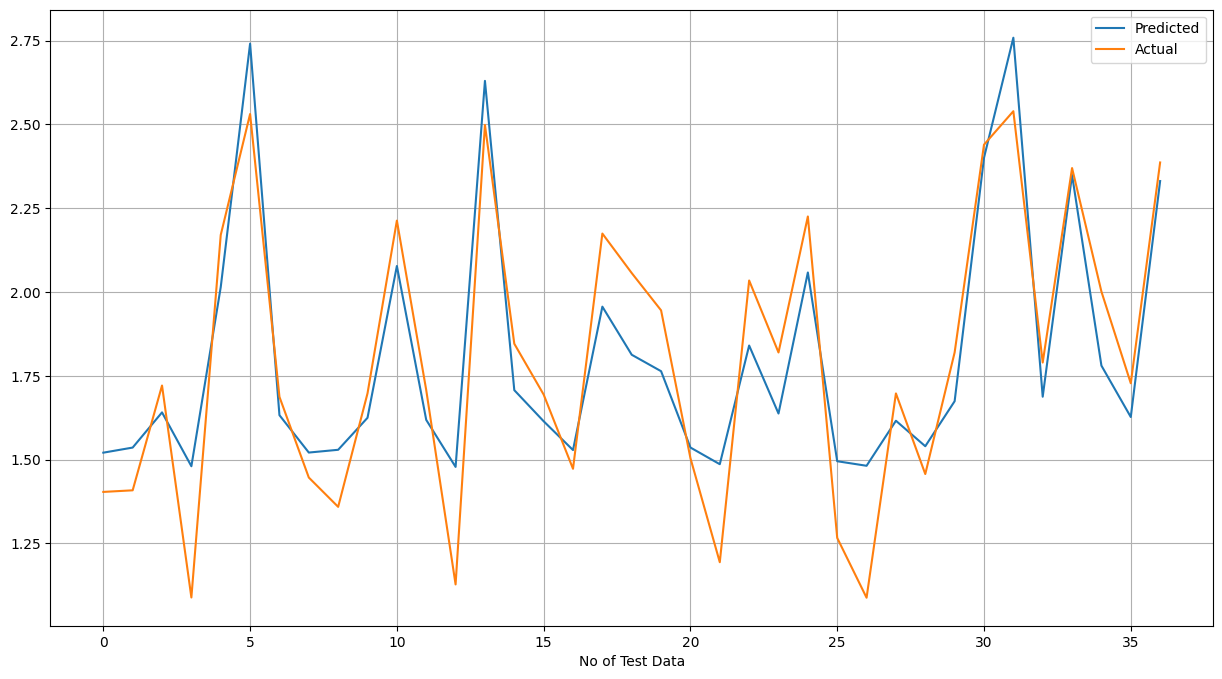

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Cross Validification

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


# Lasso Predication vs Actual (After Validification)

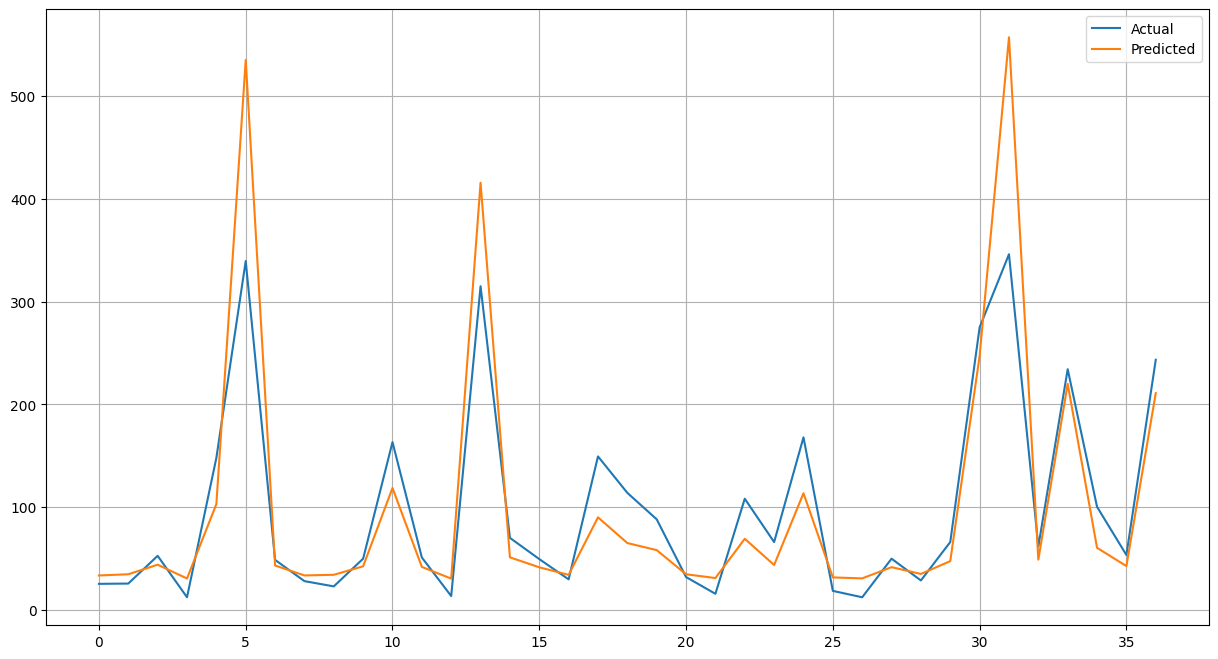

In [ ]:
# Lasso plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# Ridge Linear Regression¶

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.81465524840887

In [ ]:
y_ridge_pred = ridge.predict(X_test)

Evaluation Matrics

In [ ]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.1514311710092201
R2 : 0.8221357979190861


Ridge Predication vs Actual

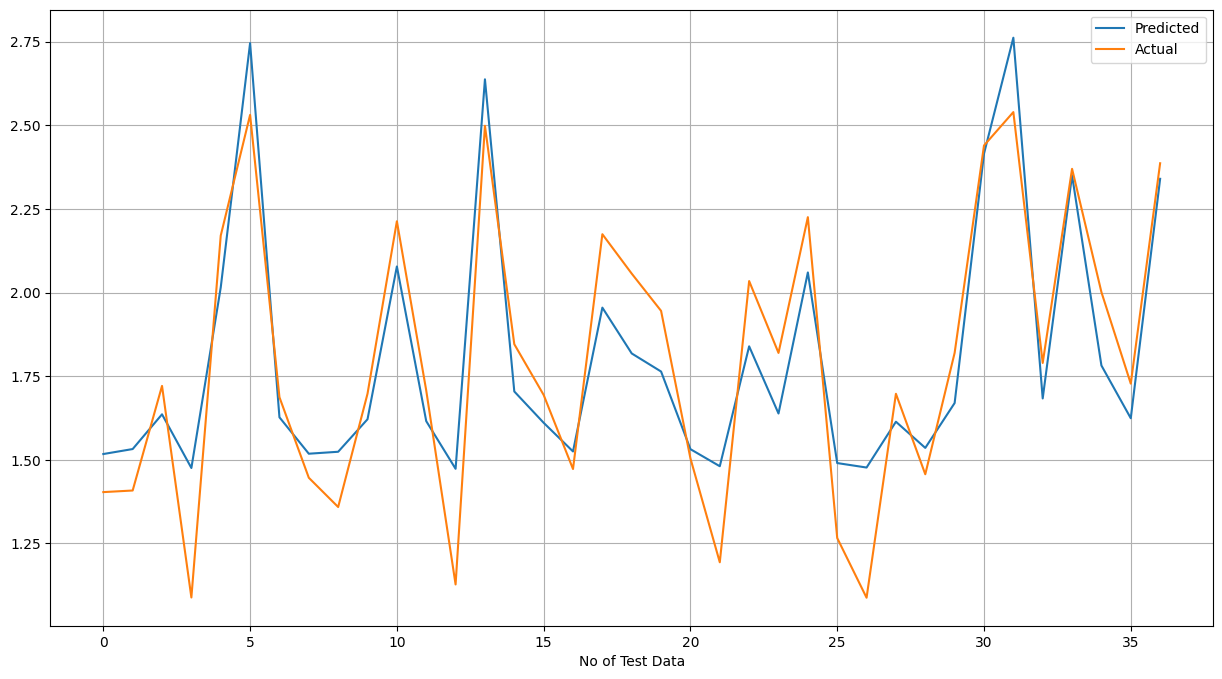

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()


Cross Validification

In [ ]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
# Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


Ridge Predication vs Actual (After Validification)

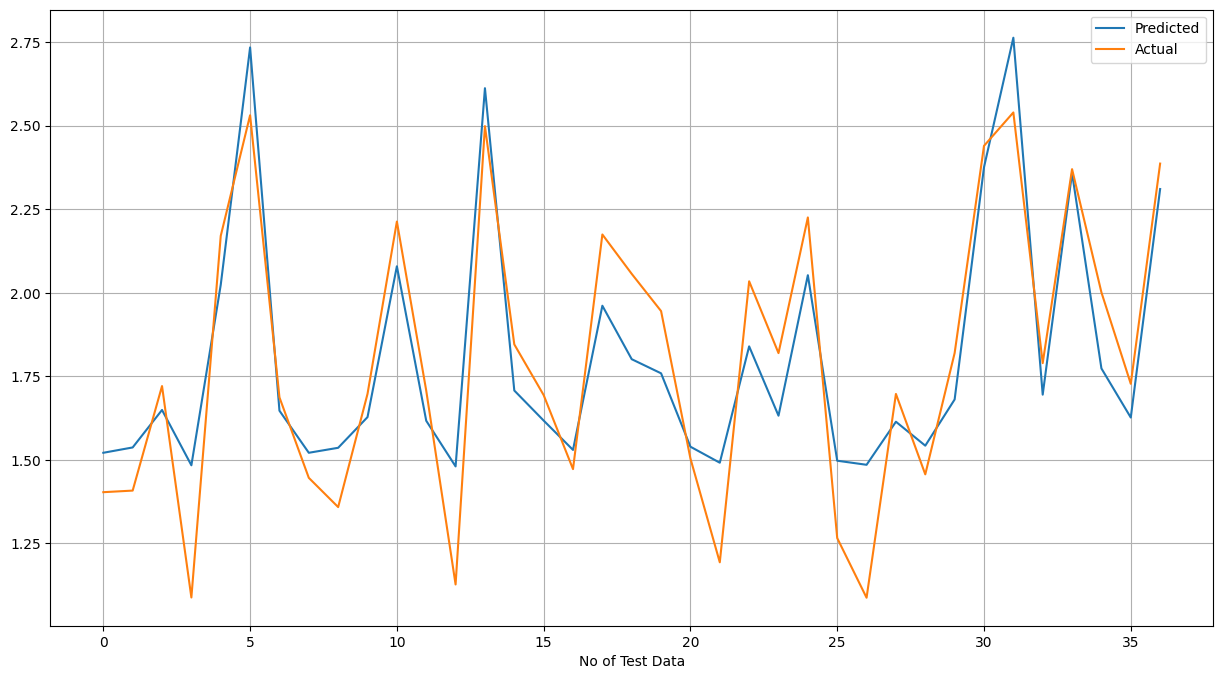

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Elastic Net Linear Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_elastic_pred = elastic.predict(X_test)

Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))


MSE : 0.03640066957363815
RMSE : 0.19078959503504941
MAE : 0.15744198421541944
R2 : 0.7955017101500742


ElasticNet Predication vs Actual

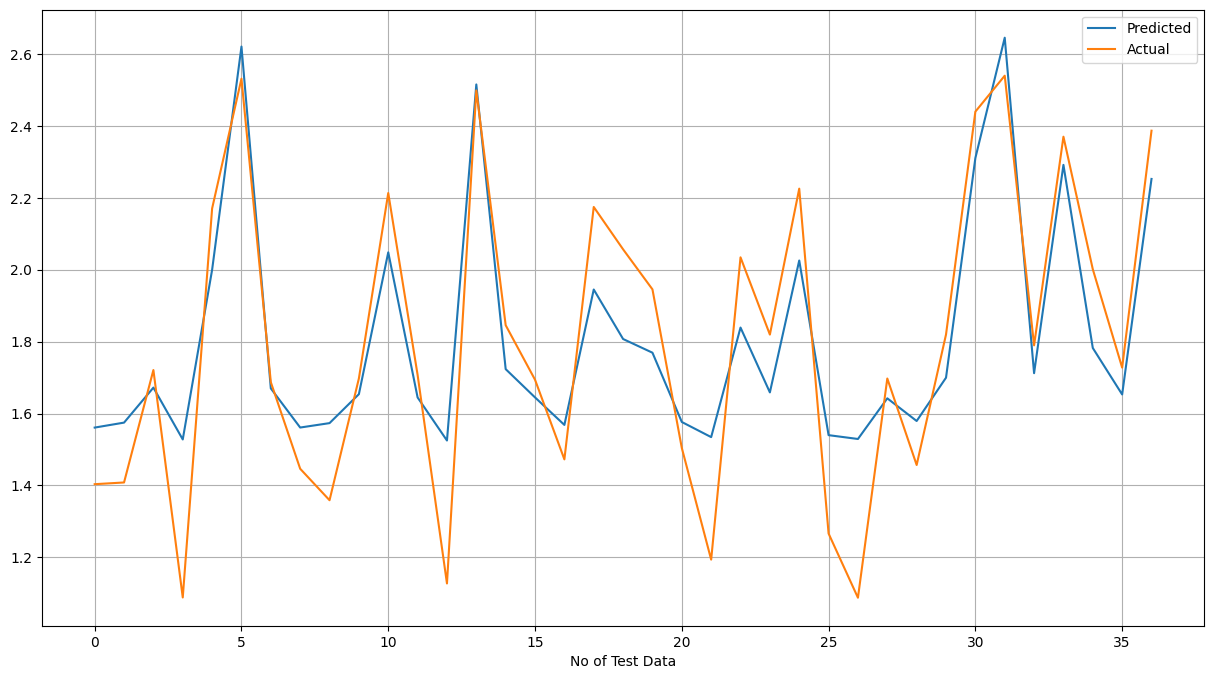

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Cross Validification

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 1}

Using  {'alpha': 0.01, 'l1_ratio': 1}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_elastic_pred = elastic_model.predict(X_test)

Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_elastic_pred )))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


ElasticNet Predication vs Actual (After Validification)

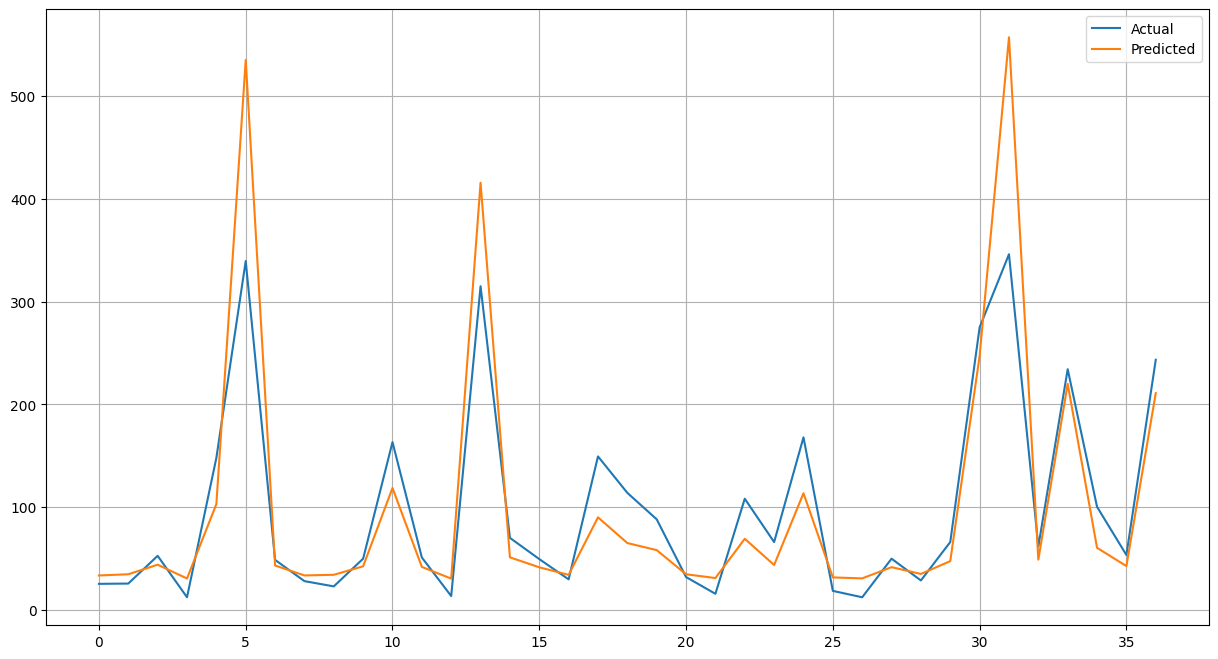

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

### <b> Conclusion

  *  We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.  
  * A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.
  * Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.   
  * Regression models namely random forest regressor, xgboost regressor and support vector regressor were built.
  * The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.
  * Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.
  * Prophet model from facebook was implemented and predictions were made from it.







